<a href="https://colab.research.google.com/github/iwanradjasa/Model-Dataset-Gambar/blob/main/Membuat_dan_Melatih_Model_untuk_Memproses_Dataset_Gambar_dari_Dunia_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
-o /tmp/Chessman-image-dataset.zip

In [ ]:
import os
import zipfile
local_zip = 'Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Knight', 'Bishop', 'Pawn', 'Rook', 'King', 'Queen']

In [ ]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


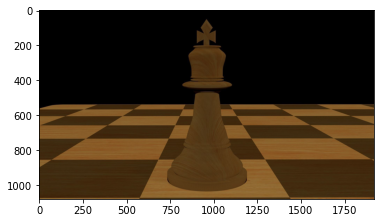

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 36s - loss: 1.8905 - accuracy: 0.1463 - val_loss: 1.7884 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 34s - loss: 1.7983 - accuracy: 0.1784 - val_loss: 1.7864 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 35s - loss: 1.7867 - accuracy: 0.1804 - val_loss: 1.7813 - val_accuracy: 0.2115
Epoch 4/50
63/63 - 34s - loss: 1.7848 - accuracy: 0.1904 - val_loss: 1.7789 - val_accuracy: 0.1923
Epoch 5/50
63/63 - 35s - loss: 1.7627 - accuracy: 0.2064 - val_loss: 1.7783 - val_accuracy: 0.2308
Epoch 6/50
63/63 - 35s - loss: 1.7555 - accuracy: 0.2285 - val_loss: 1.7068 - val_accuracy: 0.2500
Epoch 7/50
63/63 - 35s - loss: 1.7156 - accuracy: 0.2725 - val_loss: 1.7032 - val_accuracy: 0.3077
Epoch 8/50
63/63 - 34s - loss: 1.6743 - accuracy: 0.2986 - val_loss: 1.7544 - val_accuracy: 0.2885
Epoch 9/50
63/63 - 35s - loss: 1.6193 - accuracy: 0.3347 - val_loss: 1.6517 - val_accuracy: 0.3077
Epoch 10/50
63/63 - 35s - loss: 1.5413 - accuracy: 0.3848 - val_loss: 1.6602 - val_accuracy: 0.3462
Epoch 11/

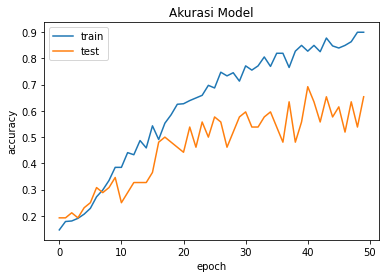

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

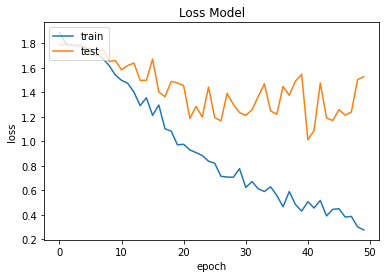

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()